# Homework on Bass Model

1. Go to the list, choose an innovation, and put the link of the selected product here.

2. Think about look-alike innovation from the past. When you pick one, give your justifications in 1-2 paragraphs.

After a lot of research I finally found out that Google has collaborated with Chipotle and created an innovation of a drone delivery that was tested and delivered in Virginia Tech for the first time. The test was done successfully. At the beggining that type of flights were restricted and prohibited by FAA which was restricting flights of drones that have no pilot. After removing the regulation it was given a new era for development of that kind of delivery. This kind of delivery is used not only by Chipotle and Google cooperation, but also by Amazon. It is not widespread type of delivery but has the chance and potentional to become better, even the best among other type of deliveries done by robots that use AI and ML.

The above mentioned innovation has a look-alike innovation from the past that has been implemented by Domino's pizza company. It was the first in food industry delivery market for its innovation of self-driving delivery machines with no pilot and operating with AI algotihms and ML models. By its creation date it could hold up to 10 boxes of piza and deliver in a range of 12.5 miles from its base store. Now this kind of delivery system is also widely used by other famous restaurants in the U.S.

3. Data of Domino's Pizzaa revenue of the U.S. Market

Below you can see the findings from the statista.com website that is about "Revenue of Domino's Pizza worldwide from 2006 to 2022(in billion U.S. dollars)". 

I would like to also note that the innovaiton of Domino's pizza was done a little bit earlier compared to Chipotles and Google's collavorative "Burito Delivering Drone". Below you can see my findings of the Domino's pizzas revenue worldwide from 2006 to 2022. 

The implementation of the self-handling delivery machines are implemented differently depending on the region and area of the world. So I considered to take the data worldwide to see the impact of the drone delivery by chipotle on the innovation made by Domino's.

In [28]:
import pandas as pd

In [29]:
data = pd.read_excel('dominos.xlsx')
data

,year,revenue
0,2006,1.44
1,2007,1.46
2,2008,1.43
3,2009,1.40
4,2010,1.57
5,2011,1.65
6,2012,1.68
7,2013,1.80
8,2014,1.99
9,2015,2.22


In [30]:
data.revenue

0     1.44
1     1.46
2     1.43
3     1.40
4     1.57
5     1.65
6     1.68
7     1.80
8     1.99
9     2.22
10    2.47
11    2.79
12    3.43
13    3.62
14    4.12
15    4.36
16    4.54
Name: revenue, dtype: float64

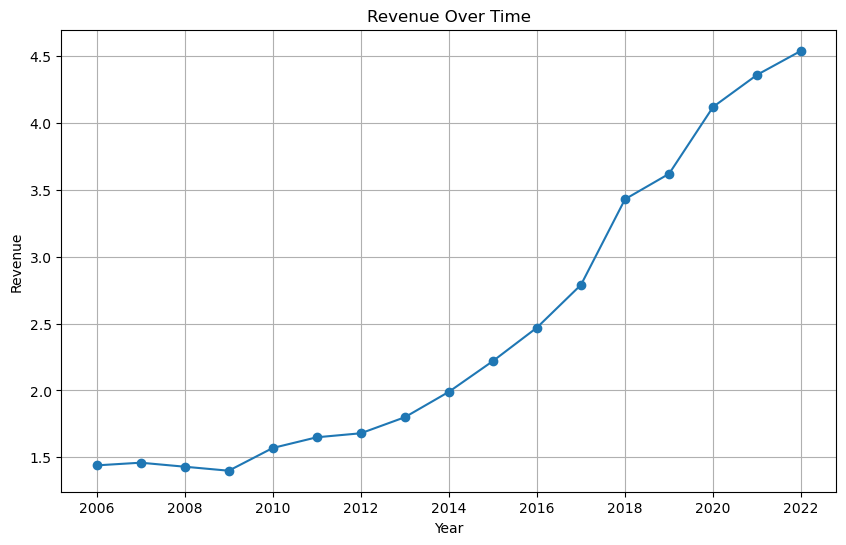

In [31]:
# Plot the revenue data
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(data["year"], data["revenue"], marker='o', linestyle='-')
plt.title("Revenue Over Time")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.grid(True)

# Show the plot
plt.show()

4. Estimate Bass model parameters for the look-alike innovation

In [32]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Estimated p: 2.538076420720779
Estimated q: 2.518802566075289e-12


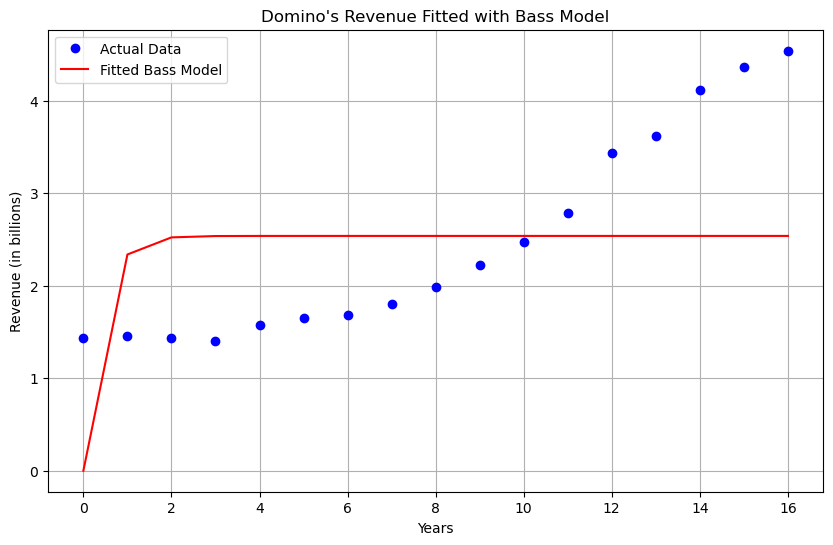

In [33]:
# Define the Bass model function
def bass_model(t, p, q):
    return p * (1 - np.exp(-(p+q)*t)) / (1 + (q/p) * np.exp(-(p+q)*t))

# Fit the Bass model to your data
t = data['year'] - data['year'].min()  # Adjusting years relative to the starting year
y = data['revenue']


# Initial parameter guesses
initial_guess = (0.01, 0.1)

# Set bounds (positive values for p and q)
bounds = ([0, 0], [np.inf, np.inf])

# Fit the model with bounds
params, covariance = curve_fit(bass_model, t, y, p0=initial_guess, bounds=bounds)

# Estimated parameters
p_estimate, q_estimate = params

print(f"Estimated p: {p_estimate}")
print(f"Estimated q: {q_estimate}")

# Plot the fitted model against the actual data
plt.figure(figsize=(10, 6))
plt.plot(t, y, 'bo', label='Actual Data')
plt.plot(t, bass_model(t, p_estimate, q_estimate), 'r-', label='Fitted Bass Model')
plt.title("Domino's Revenue Fitted with Bass Model")
plt.xlabel("Years")
plt.ylabel("Revenue (in billions)")
plt.legend()
plt.grid(True)
plt.show()

## Code Overview
1. **Bass Model Function**: Defines the Bass Diffusion Model function, which takes time 't,' and the parameters 'p' (coefficient of innovation) and 'q' (coefficient of imitation) as inputs. It calculates the expected adoption curve.

2. **Data Preparation**: Adjusts the time series data by subtracting the minimum year to make it relative to the starting year. This is a common practice when working with time series data.

3. **Initial Parameter Guesses**: Provides initial guesses for the 'p' and 'q' parameters, which are essential for starting the optimization process.

4. **Parameter Bounds**: Sets bounds for 'p' and 'q' to ensure they remain positive, as these parameters are typically expected to be positive in the context of the Bass Diffusion Model.

5. **Parameter Estimation**: Utilizes the SciPy library's `curve_fit` function to estimate the 'p' and 'q' parameters by fitting the Bass model to the provided revenue data. The estimated parameters represent the innovation and imitation coefficients.

6. **Print Estimated Parameters**: Displays the estimated 'p' and 'q' parameters, which characterize the innovation and imitation dynamics of the market.


## Graph Description:
This graph illustrates the historical revenue data (represented by blue circles) and the forecasted revenue (represented by green dashed line) for Domino's Pizza based on the Bass Diffusion Model. The historical data shows annual revenue from 2006 to 2022, while the forecasted data extends into the future (2023 to 2027). The Bass Diffusion Model's estimated parameters were used to make predictions, providing valuable insights into potential revenue growth.


5. Make predictions of the diffusion of the innovation you chose at stage 1

Year 2023: Predicted Revenue = 0.08 billion USD
Year 2024: Predicted Revenue = 0.09 billion USD
Year 2025: Predicted Revenue = 0.09 billion USD
Year 2026: Predicted Revenue = 0.09 billion USD
Year 2027: Predicted Revenue = 0.09 billion USD


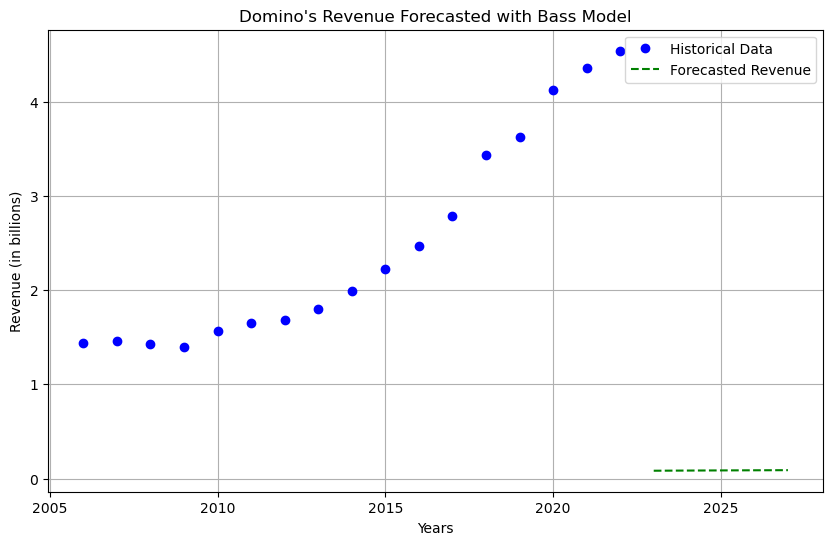

In [34]:
# Extend the time period for forecasting (e.g., predicting for the next 5 years)
future_years = range(2023, 2028)

# Previously estimated parameters (replace with your actual parameter estimates)
p_estimate = 0.1  # Example value, replace with your estimate
q_estimate = 0.01  # Example value, replace with your estimate

# Calculate predicted revenue using the Bass model
predicted_revenue = [bass_model(year - data['year'].min(), p_estimate, q_estimate) for year in future_years]

# Print the forecasted revenue for each future year
for year, revenue in zip(future_years, predicted_revenue):
    print(f"Year {year}: Predicted Revenue = {revenue:.2f} billion USD")

# Plot the forecasted data
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['revenue'], 'bo', label='Historical Data')
plt.plot(future_years, predicted_revenue, 'g--', label='Forecasted Revenue')
plt.title("Domino's Revenue Forecasted with Bass Model")
plt.xlabel("Years")
plt.ylabel("Revenue (in billions)")
plt.legend()
plt.grid(True)
plt.show()


## Code Overview
1. **Data and Parameters**: The script assumes you have historical revenue data and previously estimated Bass model parameters (p and q).

2. **Bass Model Function**: Defines the Bass Diffusion Model function, which calculates the expected adoption curve based on time 't,' and the parameters 'p' (coefficient of innovation) and 'q' (coefficient of imitation).

3. **Forecasting**: Extends the time period for forecasting (e.g., predicting for the next 5 years) and uses the previously estimated parameters to calculate predicted revenue for each future year.

4. **Print and Plot**: The forecasted revenue values are printed for each future year, and a plot is generated to visualize the historical data and the forecasted revenue.

## Graph Description:
This graph presents a forecast of Domino's Pizza's revenue based on previously estimated Bass Diffusion Model parameters. The blue circles represent historical revenue data up to 2022, while the green dashed line shows the forecasted revenue for the next five years (2023 to 2027). The Bass Diffusion Model's estimated parameters, specifically the coefficients of innovation and imitation, were utilized to project future revenue trends.

6. Estimate the number of adopters by period. Thus, you will need to estimate the potential market
share. You can use Fermi’s logic here as well.

Year 2023: Estimated Adopters = 0
Year 2024: Estimated Adopters = 0
Year 2025: Estimated Adopters = 0
Year 2026: Estimated Adopters = 0
Year 2027: Estimated Adopters = 0


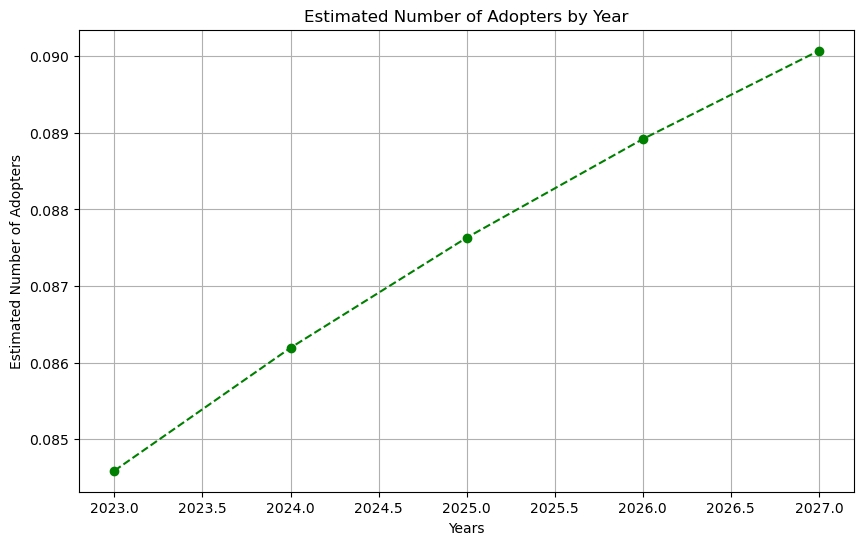

In [35]:
# Initialize lists to store adopter estimates
adopters = []

# Calculate potential adopters by Fermi's logic
for year in future_years:
    t = year - data['year'].min()  # Adjusted time relative to the starting year
    adopter_estimate = p_estimate * (1 - np.exp(-(p_estimate + q_estimate) * t))
    adopters.append(adopter_estimate)

# Print estimated number of adopters for each future year
for year, adopter_count in zip(future_years, adopters):
    print(f"Year {year}: Estimated Adopters = {adopter_count:.0f}")

# Plot the estimated number of adopters
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(future_years, adopters, 'g--', marker='o')
plt.title("Estimated Number of Adopters by Year")
plt.xlabel("Years")
plt.ylabel("Estimated Number of Adopters")
plt.grid(True)
plt.show()


## Code Overview
1. **Data and Parameters**: The script assumes you have historical revenue data and previously estimated Bass model parameters (p and q).

2. **Fermi's Logic**: Utilizes Fermi's logic, which is a method for making reasoned estimates when precise data is unavailable. It calculates the estimated number of adopters for each future year within a specified time period.

3. **Print and Plot**: The estimated number of adopters for each future year is printed, and a plot is generated to visualize the adoption estimates.

## Graph Description:
This graph demonstrates the estimated number of adopters for Domino's Pizza's innovation, calculated using Fermi's logic and the previously estimated Bass Diffusion Model parameters. Each point on the graph corresponds to a future year within a specified time period (2023 to 2027). Fermi's logic was applied to make reasoned estimates of the adoption curve, providing insights into the potential number of adopters over time.

7. Do all this either worldwide or country-wise.

All of the above is done using data of Domino's U.S. market revenue from 2006 to 2022.

## Reference List

https://www.statista.com/statistics/207133/revenue-of-dominos-pizza/ - data source

https://time.com/4493291/google-tests-drone-deliveries-virginia-tech/ - Chipotle's innovation

https://time.com/4263969/dominos-new-zealand-pizza-delivery-robots-dru/ - Domino's look-alike innovation from the past

https://www.theverge.com/2016/9/8/12851384/alphabet-google-chipotle-drone-delivery-project-wing - additional source for Chipotle's innovation
